<a href="https://colab.research.google.com/github/gp201/CNN-Handwritten-digits/blob/master/finalprj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Author: Praneeth(gp01)
#import library

import numpy
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
# load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# reshape to be [samples][width][height][pixels]
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# normalize inputs from 0-255 to 0-1
train_images = train_images / 255
test_images = test_images / 255
# idk what 
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

In [0]:
# define the larger model
model = tf.keras.Sequential()
model.add(Conv2D(32, (5, 5),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu')) #Hidden layer 1
model.add(Dense(50, activation='relu')) #hidden layer 2
model.add(Dense(10, activation='softmax')) #O/P layer
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Fit the model
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=200)
# Final evaluation of the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:%.2f%%' % (test_acc*100))
print('Test loss:', test_loss)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2770 - acc: 0.9158 - val_loss: 0.0688 - val_acc: 0.9777
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0690 - acc: 0.9790 - val_loss: 0.0383 - val_acc: 0.9877
Epoch 3/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0479 - acc: 0.9850 - val_loss: 0.0312 - val_acc: 0.9902
Epoch 4/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0372 - acc: 0.9883 - val_loss: 0.0282 - val_acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0315 - acc: 0.9899 - val_loss: 0.0261 - val_acc: 0.9921
Epoch 6/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0271 - acc: 0.9914 - val_loss: 0.0326 - val_acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sa

In [0]:
#disp func
def display(i):
    img = test_images[i]
    print('\n Digit in the image',np.argmax(test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

 Predicted:  0

 Digit in the image 0


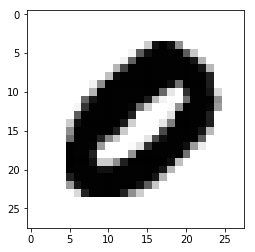

In [0]:
#Author: Praneeth(gp01)
#predicting the value

import random
ex=random.randrange(1 , 10000 , 1) #problem number

new_samples = np.array([test_images[ex]], dtype=float)
y = list(model.predict(new_samples))

print (" Predicted: ",np.argmax(y))
display(ex)